In [21]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import pickle


In [22]:
%ls

 Volume in drive E is New Volume
 Volume Serial Number is EA03-E066

 Directory of e:\University\3rd Semester\AI ( LAB )\Usman Project

05-Dec-25  02:03 AM    <DIR>          .
05-Dec-25  01:51 AM    <DIR>          ..
05-Dec-25  02:03 AM                 0 pro.ipynb
05-Dec-25  01:48 AM           155,382 SAP-4000.csv
               2 File(s)        155,382 bytes
               2 Dir(s)  64,747,327,488 bytes free


In [25]:
df = pd.read_csv("SAP-4000.csv")
df

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,Male,5.5,No,Urban,72.7,Tertiary,43.5
1,Female,6.8,No,Urban,62.0,Primary,51.7
2,Female,9.7,No,Rural,95.0,Secondary,70.1
3,Male,13.3,Yes,Rural,52.9,NaN,79.5
4,Female,8.9,No,Urban,50.8,NaN,52.2
...,...,...,...,...,...,...,...
3995,Male,11.3,Yes,Urban,79.5,Secondary,93.5
3996,Male,3.7,Yes,Urban,50.7,Tertiary,53.8
3997,Female,0.0,No,Rural,72.7,Tertiary,25.4
3998,Male,4.0,No,Urban,62.2,Tertiary,40.3


In [26]:
df = pd.read_csv("SAP-4000.csv")

print(df.head())
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())


   Gender  HoursStudied/Week Tutoring Region  Attendance(%) Parent Education  \
0    Male                5.5       No  Urban           72.7         Tertiary   
1  Female                6.8       No  Urban           62.0          Primary   
2  Female                9.7       No  Rural           95.0        Secondary   
3    Male               13.3      Yes  Rural           52.9              NaN   
4  Female                8.9       No  Urban           50.8              NaN   

   Exam_Score  
0        43.5  
1        51.7  
2        70.1  
3        79.5  
4        52.2  
Shape: (4000, 7)

Missing Values:
 Gender                 0
HoursStudied/Week      0
Tutoring               0
Region                 0
Attendance(%)          0
Parent Education     422
Exam_Score             0
dtype: int64


In [27]:
df = df.fillna(df.mean(numeric_only=True))
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode().iloc[0])

df.head()


,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,Male,5.5,No,Urban,72.7,Tertiary,43.5
1,Female,6.8,No,Urban,62.0,Primary,51.7
2,Female,9.7,No,Rural,95.0,Secondary,70.1
3,Male,13.3,Yes,Rural,52.9,Secondary,79.5
4,Female,8.9,No,Urban,50.8,Secondary,52.2


In [28]:
df["HoursStudied/Week"] = df["HoursStudied/Week"].astype(float)
df["Attendance(%)"] = df["Attendance(%)"].astype(float)
df["Exam_Score"] = df["Exam_Score"].astype(float)

df.dtypes


Gender                object
HoursStudied/Week    float64
Tutoring              object
Region                object
Attendance(%)        float64
Parent Education      object
Exam_Score           float64
dtype: object

In [ ]:
X = df[[
    "Gender",
    "HoursStudied/Week",
    "Tutoring",
    "Region",
    "Attendance(%)",
    "Parent Education"
]]

y = df["Exam_Score"]

cat_cols = X.select_dtypes(include=["object"]).columns
X[cat_cols] = X[cat_cols].apply(lambda col: pd.factorize(col)[0])

X.head()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13192\1974404359.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cat_cols] = X[cat_cols].apply(lambda col: pd.factorize(col)[0])


,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education
0,0,5.5,0,0,72.7,0
1,1,6.8,0,0,62.0,1
2,1,9.7,0,1,95.0,2
3,0,13.3,1,1,52.9,2
4,1,8.9,0,0,50.8,2


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=False
)

scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


In [31]:
models = {
    "RandomForest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "GradientBoost": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_s, y_train)
    preds = model.predict(X_test_s)

    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2}

results_df = pd.DataFrame(results).T
results_df


,RMSE,MAE,R2
RandomForest,5.491553,4.323645,0.887664
DecisionTree,7.544418,5.910333,0.787977
KNN,6.078794,4.743433,0.862353
SVR,5.488257,4.346307,0.887798
AdaBoost,5.938445,4.783307,0.868636
GradientBoost,5.097069,4.063849,0.903223


In [37]:
best_name = results_df["RMSE"].idxmin()
best_model = models[best_name]

with open("best_regressor.pkl", "wb") as f:
    pickle.dump({
        "model": best_model,
        "scaler": scaler,
        "features": X.columns.tolist()
    }, f)

print(f"Best model saved: {best_name}")


Best model saved: GradientBoost


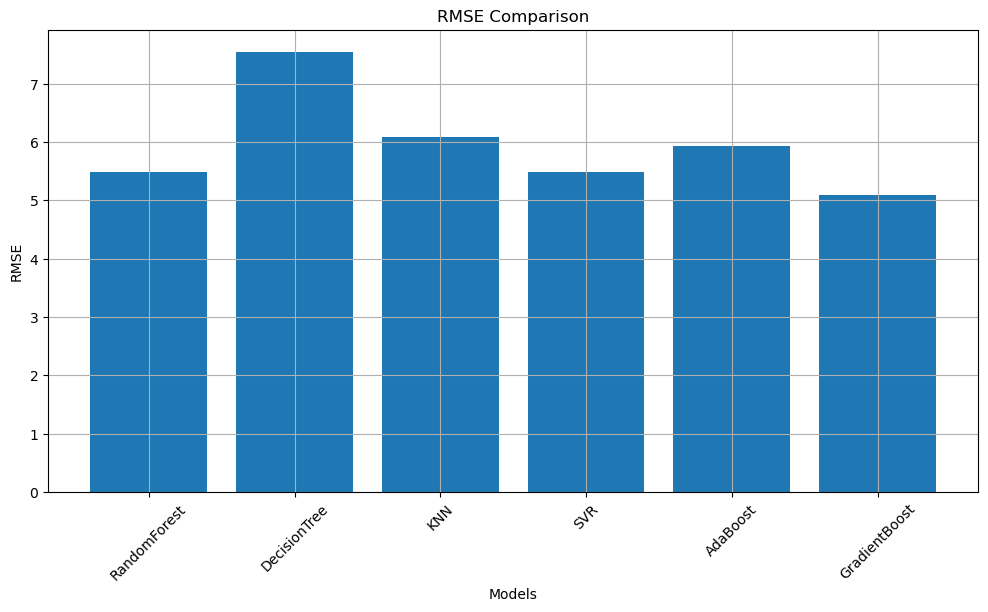

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(results_df.index, results_df["RMSE"])
plt.title("RMSE Comparison")
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

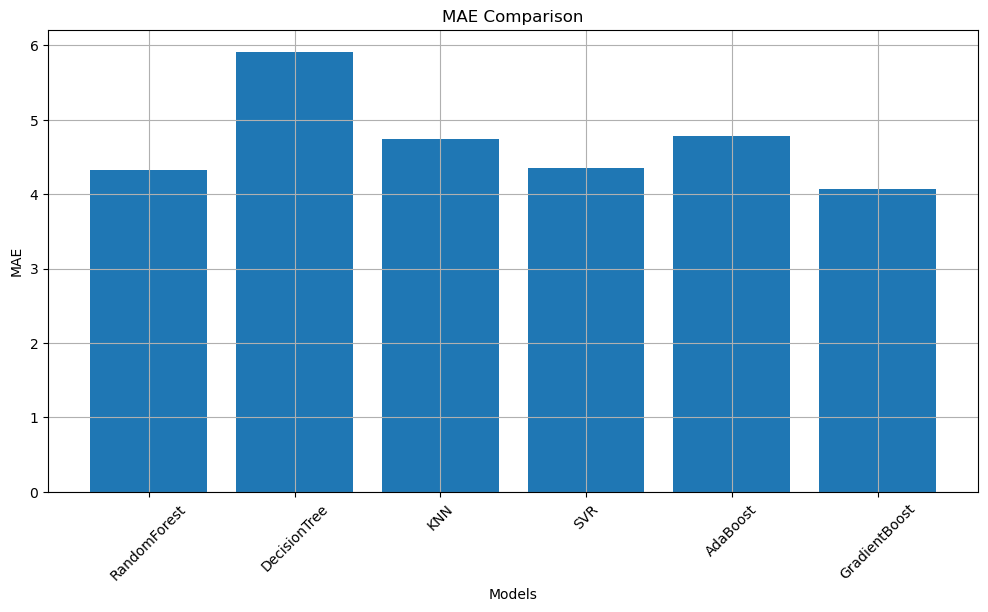

In [34]:
plt.figure(figsize=(12, 6))
plt.bar(results_df.index, results_df["MAE"])
plt.title("MAE Comparison")
plt.xlabel("Models")
plt.ylabel("MAE")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

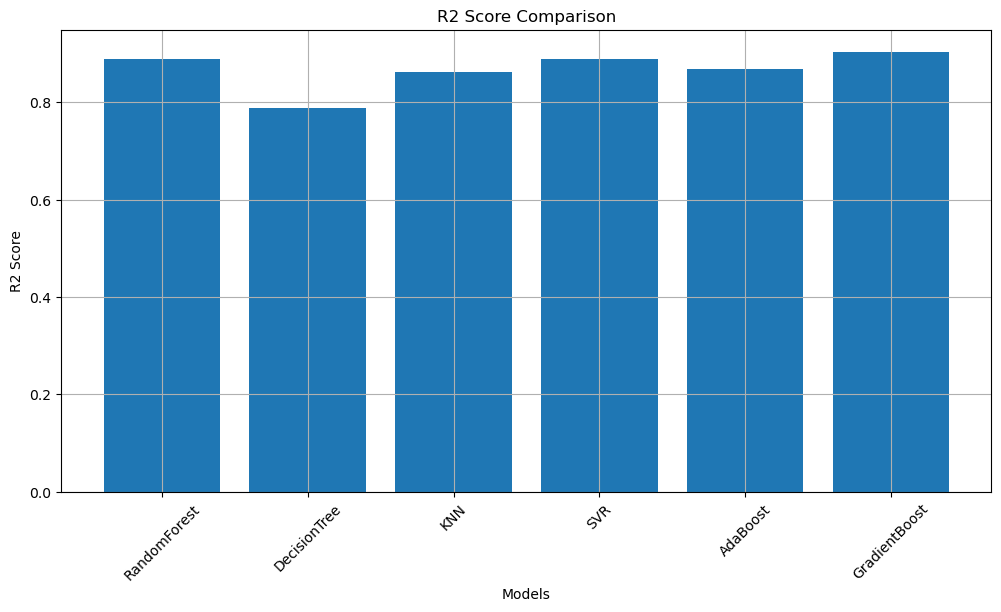

In [35]:
plt.figure(figsize=(12, 6))
plt.bar(results_df.index, results_df["R2"])
plt.title("R2 Score Comparison")
plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

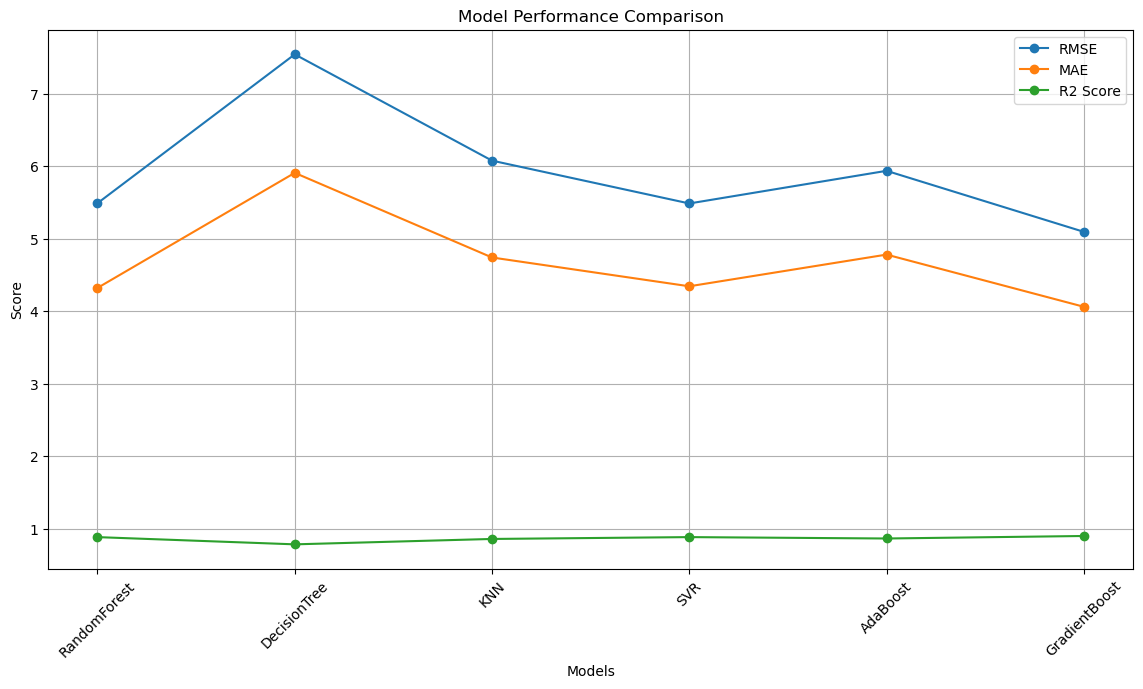

In [36]:
plt.figure(figsize=(14, 7))

plt.plot(results_df.index, results_df["RMSE"], marker="o", label="RMSE")
plt.plot(results_df.index, results_df["MAE"], marker="o", label="MAE")
plt.plot(results_df.index, results_df["R2"], marker="o", label="R2 Score")

plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


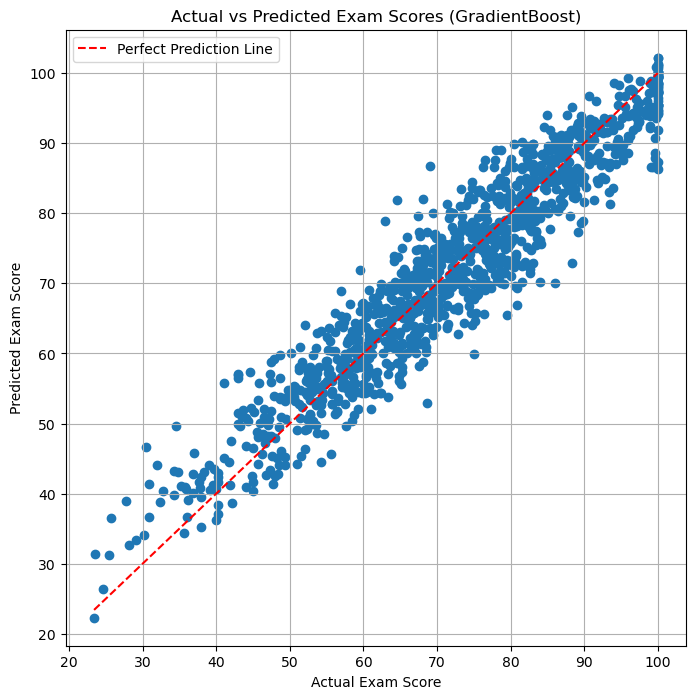

In [39]:

best_preds = best_model.predict(X_test_s)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, best_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Perfect Prediction Line")

plt.title(f"Actual vs Predicted Exam Scores ({best_name})")
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.legend()
plt.grid(True)
plt.show()
